In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/mac/Desktop/CSV.FILE/spam.csv", encoding="ISO-8859-1")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,NaN,NaN,NaN
419,spam,Send a logo 2 ur lover - 2 names joined by a h...,NaN,NaN,NaN
57,ham,"Sorry, I'll call later in meeting.",NaN,NaN,NaN
5084,ham,Hey happy birthday...,NaN,NaN,NaN
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y...",NaN,NaN,NaN
2225,ham,Alrite jod hows the revision goin? Keris bin d...,NaN,NaN,NaN
4313,ham,Is ur changes 2 da report big? Cos i've alread...,NaN,NaN,NaN
4110,spam,URGENT! Your Mobile number has been awarded a ...,NaN,NaN,NaN
4611,ham,Sorry da. I gone mad so many pending works wha...,NaN,NaN,NaN
4051,ham,"Ya ok, then had dinner?",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
## Stage of Project
### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Evaluation
### 6. Improvemnt depending on the Evaluation
### 7. Website
### 8. Deploy the model

### 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
## Drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
5378,spam,Free entry to the gr8prizes wkly comp 4 a chan...
613,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
3957,ham,So i could kiss and feel you next to me...
110,ham,What is the plural of the noun research?
1264,ham,I will see in half an hour


In [11]:
### Rename the Columns if it need
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [12]:
df.sample(5)

,Target,Text
1137,ham,LOL ... No just was busy
1457,spam,CLAIRE here am havin borin time & am now alone...
653,ham,Fine i miss you very much.
5447,ham,So that takes away some money worries
2075,ham,Must come later.. I normally bathe him in da a...


In [13]:
# Target value convert into 0,1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Target'] = encoder.fit_transform(df['Target'])

In [15]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check for duplicate
df.duplicated().sum()

403

In [17]:
#Remove the Duplicate
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

### 2.EDA

In [21]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

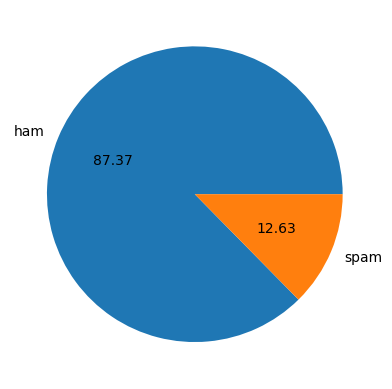

In [23]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

##### Here we can the Data is Imbalance.

In [25]:
## Check how many sentences, words and alphabate used in this datasets
import nltk

In [26]:
## Count the number Character
df['num_char'] = df['Text'].apply(len)

In [27]:
# Number of Words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,Target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
# for ham
df[df['Target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# For Spam
df[df['Target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

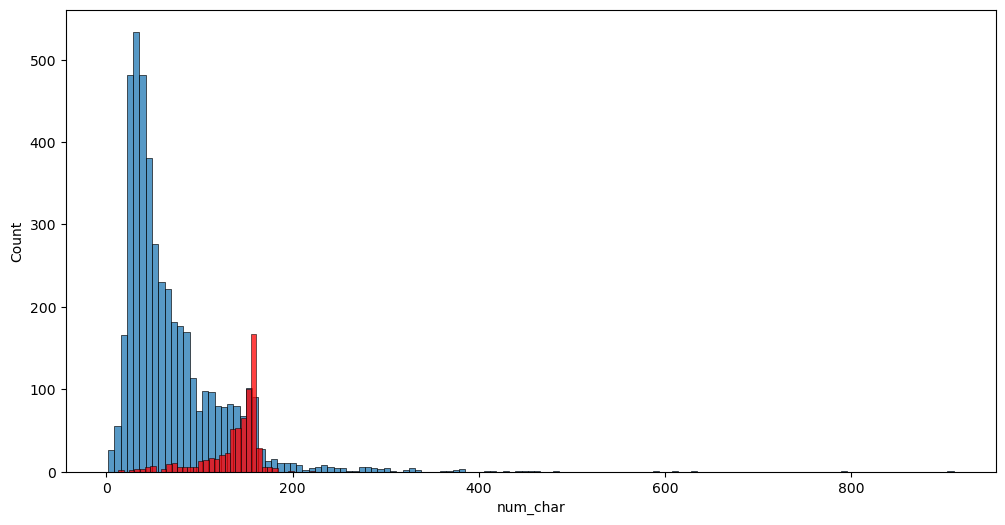

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_char'])
sns.histplot(df[df['Target'] == 1]['num_char'],color='red')
plt.show()

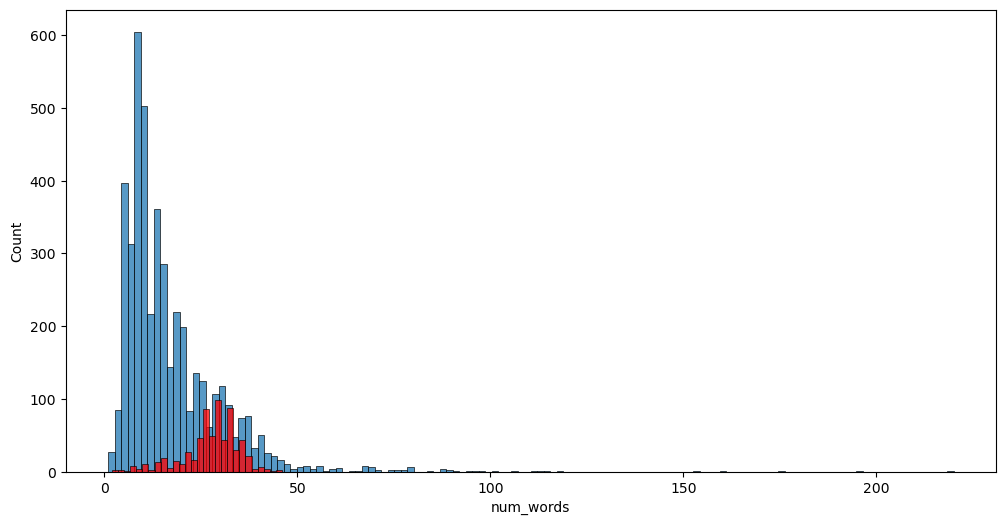

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')
plt.show()

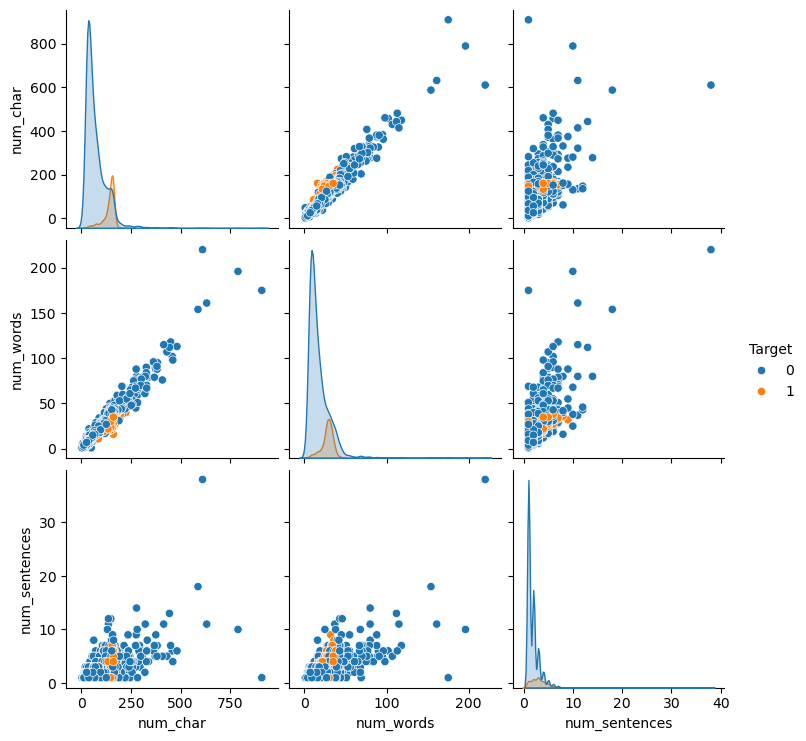

In [36]:
sns.pairplot(df,hue='Target')

In [37]:
df.dtypes

Target            int64
Text             object
num_char          int64
num_words         int64
num_sentences     int64
dtype: object

In [38]:
num = df[['Target','num_char','num_words','num_sentences']]

In [39]:
num.corr()

,Target,num_char,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

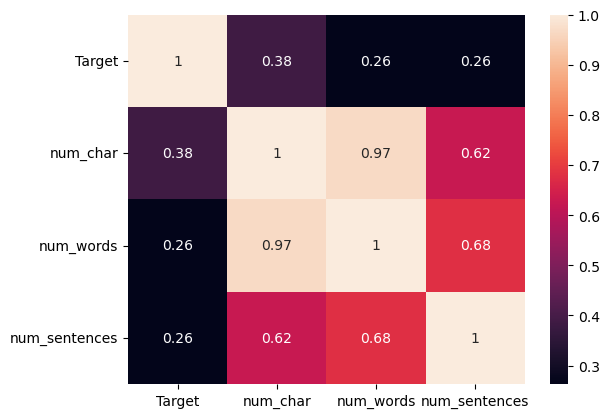

In [40]:
sns.heatmap(num.corr(),annot=True)

### 3. Data Preprocessing/ Text Preprocessing

### . Lowercase
### . Tokenization
### . Removing special character
### . Removing stop words and punctuation
### . Stemming

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
import string
from nltk.tokenize import word_tokenize

In [45]:
from nltk.corpus import stopwords

In [46]:
import string
print(string.punctuation)  # Correct spelling

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return y

In [48]:
df['transform_text'] = df['Text'].apply(transform_text)

In [49]:
df.head()

,Target,Text,num_char,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [50]:
## Generate word cloud
from wordcloud import WordCloud

In [51]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['Target'] == 1]['transform_text'].astype(str).str.cat(sep=" "))

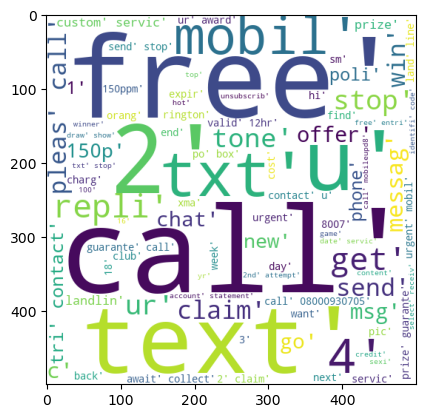

In [53]:
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['Target'] == 0]['transform_text'].astype(str).str.cat(sep=" "))

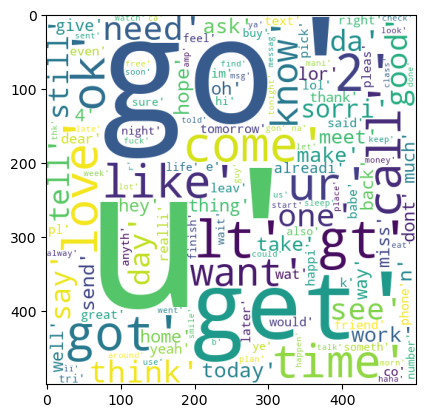

In [55]:
plt.imshow(ham_wc)

### 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [58]:
df['transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X = cv.fit_transform(df['transform_text']).toarray()


In [59]:
X.shape

(5169, 6708)

In [60]:
Y = df['Target'].values

In [61]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
# Train Test Split
from sklearn.model_selection import train_test_split 

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred1))
print("Confusion matrix is",confusion_matrix(y_test,y_pred1))
print("Precision score is",precision_score(y_test,y_pred1))


Accuracy score is 0.8800773694390716
Confusion matrix is [[792 104]
 [ 20 118]]
Precision score is 0.5315315315315315


In [67]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred2))
print("Confusion matrix is",confusion_matrix(y_test,y_pred2))
print("Precision score is",precision_score(y_test,y_pred2))


Accuracy score is 0.9642166344294004
Confusion matrix is [[871  25]
 [ 12 126]]
Precision score is 0.8344370860927153


In [68]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred3))
print("Confusion matrix is",confusion_matrix(y_test,y_pred3))
print("Precision score is",precision_score(y_test,y_pred3))


Accuracy score is 0.9700193423597679
Confusion matrix is [[893   3]
 [ 28 110]]
Precision score is 0.9734513274336283


### Here apply TDF-IDF Vectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [71]:
X = tfidf.fit_transform(df['transform_text']).toarray()


In [72]:
X.shape

(5169, 6708)

In [73]:
Y = df['Target'].values

In [74]:
from sklearn.model_selection import train_test_split 

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [110]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred1))
print("Confusion matrix is",confusion_matrix(y_test,y_pred1))
print("Precision score is",precision_score(y_test,y_pred1))


Accuracy score is 0.8762088974854932
Confusion matrix is [[793 103]
 [ 25 113]]
Precision score is 0.5231481481481481


In [108]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred2))
print("Confusion matrix is",confusion_matrix(y_test,y_pred2))
print("Precision score is",precision_score(y_test,y_pred2))


Accuracy score is 0.9593810444874274
Confusion matrix is [[896   0]
 [ 42  96]]
Precision score is 1.0


In [80]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred3))
print("Confusion matrix is",confusion_matrix(y_test,y_pred3))
print("Precision score is",precision_score(y_test,y_pred3))


Accuracy score is 0.9700193423597679
Confusion matrix is [[893   3]
 [ 28 110]]
Precision score is 0.9734513274336283


#### Here i choose tfidf with MNB

### Compare with different Machine Learning Algorithm

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lr,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbt,
    'xgb':xgb
}

In [86]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

In [87]:
from sklearn.metrics import precision_score, accuracy_score

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
    
    return accuracy, precision  # Ensure this returns a tuple


In [89]:
print(f"Classifier: {clfs}, Accuracy: {accuracy_score}, Precision: {precision_score}")


Classifier: {'SVC': SVC(gamma=1.0, kernel='sigmoid'), 'KN': KNeighborsClassifier(), 'NB': MultinomialNB(), 'DT': DecisionTreeClassifier(max_depth=5), 'LR': LogisticRegression(penalty='l1', solver='liblinear'), 'RF': RandomForestClassifier(n_estimators=50, random_state=2), 'AdaBoost': AdaBoostClassifier(random_state=2), 'BgC': BaggingClassifier(n_estimators=50, random_state=2), 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2), 'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None

In [91]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(4135, 6708) (4135,) (1034, 6708) (1034,)


In [93]:
from sklearn.metrics import precision_score, accuracy_score  # Ensure correct function import

accuracy_scores = []
precision_scores = []  # Use correct variable name

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    
    accuracy_scores.append(current_accuracy)  
    precision_scores.append(current_precision)


For  SVC
Accuracy: 0.9729206963249516
Precision: 0.9729498675271409
For  KN
Accuracy: 0.9003868471953579
Precision: 0.9106572723594
For  NB
Accuracy: 0.9593810444874274
Precision: 0.9611998036894829
For  DT
Accuracy: 0.9352030947775629
Precision: 0.9317536230116675
For  LR
Accuracy: 0.9516441005802708
Precision: 0.9511703577301099
For  RF
Accuracy: 0.971953578336557
Precision: 0.9728328715562758


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9608346521305903
For  BgC
Accuracy: 0.9584139264990329
Precision: 0.9576711473777019
For  ETC
Accuracy: 0.9729206963249516
Precision: 0.9731694470386715
For  GBDT
Accuracy: 0.9526112185686654
Precision: 0.9515881228452513
For  xgb
Accuracy: 0.9729206963249516
Precision: 0.9724688146445182


In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.972921,0.973169
0,SVC,0.972921,0.972950
5,RF,0.971954,0.972833
10,xgb,0.972921,0.972469
2,NB,0.959381,0.961200
6,AdaBoost,0.961315,0.960835
7,BgC,0.958414,0.957671
9,GBDT,0.952611,0.951588
4,LR,0.951644,0.951170
3,DT,0.935203,0.931754


In [99]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [101]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.972921
1,SVC,Accuracy,0.972921
2,RF,Accuracy,0.971954
3,xgb,Accuracy,0.972921
4,NB,Accuracy,0.959381
5,AdaBoost,Accuracy,0.961315
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.935203


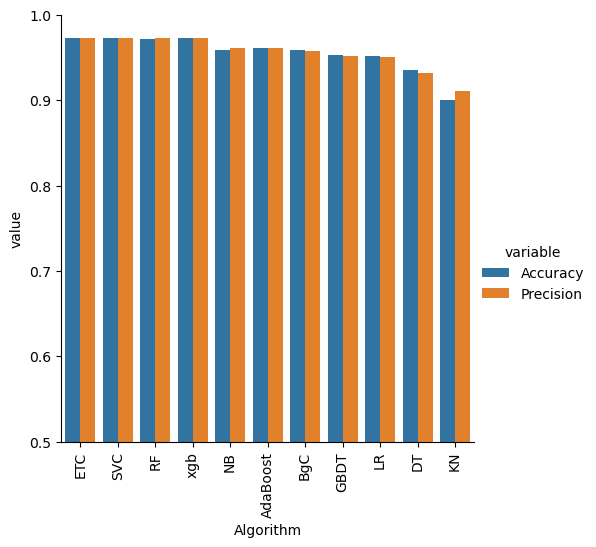

In [105]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [114]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))